<a href="https://colab.research.google.com/github/joynaomi81/Olusanya-Joy-Naomi-Undergraduate-Long-Essay-Code/blob/main/Word_Level_ASR_Tranining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os
import shutil

# Define paths
zip_path = '/content/drive/MyDrive/Colab Notebooks/Lexical_words (1).zip'
extract_dir = '/content/lexical_words_extracted'
audio_target_dir = '/content/first_100_audio'

# Step 1: Unzip everything to a temporary folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Locate recorder.tsv
tsv_path = None
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file == 'recorder.tsv':
            tsv_path = os.path.join(root, file)
            break

# Step 3: Copy recorder.tsv to /content/
if tsv_path:
    shutil.copy(tsv_path, '/content/recorder.tsv')
    print(" recorder.tsv copied to /content/")
else:
    print("recorder.tsv not found.")

# Step 4: Find and copy first 100 audio files to /content/first_100_audio
os.makedirs(audio_target_dir, exist_ok=True)
audio_files = []

for root, dirs, files in os.walk(extract_dir):
    for file in sorted(files):  # ensure deterministic order
        if file.lower().endswith(('.wav', '.mp3', '.flac')):
            audio_files.append(os.path.join(root, file))

# Copy the first 100 audio files
for audio_file in audio_files[:100]:
    shutil.copy(audio_file, audio_target_dir)

print(f" Copied {min(100, len(audio_files))} audio files to {audio_target_dir}")


 recorder.tsv copied to /content/
 Copied 100 audio files to /content/first_100_audio


In [4]:
import pandas as pd

# Load the TSV file (no header in the file)
df = pd.read_csv('/content/recorder.tsv', sep='\t', header=None)

# Assign column names manually
df.columns = ['file_path', 'speaker_id', 'category', 'misc', 'lexical_word']

# Show first 5 rows
df.head()


,file_path,speaker_id,category,misc,lexical_word
0,/Users/yorubaname.org/Desktop/audio-data/recor...,Ola_H7iQt4Ue2scLNbq5,lexical_words,NaN,ọ̀ku
1,/Users/yorubaname.org/Desktop/audio-data/recor...,Ola_H7iQt4Ue2scLNbq5,lexical_words,NaN,otẹ̀
2,/Users/yorubaname.org/Desktop/audio-data/recor...,Ola_H7iQt4Ue2scLNbq5,lexical_words,NaN,sumi
3,/Users/yorubaname.org/Desktop/audio-data/recor...,Ola_H7iQt4Ue2scLNbq5,lexical_words,NaN,akónilẹ́rú
4,/Users/yorubaname.org/Desktop/audio-data/recor...,Ola_H7iQt4Ue2scLNbq5,lexical_words,NaN,ìfẹ́kúfẹ̀ẹ́


In [5]:
import os
import pandas as pd

#Load the 100 audio filenames
audio_dir = '/content/first_100_audio'
audio_files = sorted(os.listdir(audio_dir))

#Load the recorder.tsv without headers
df = pd.read_csv('/content/recorder.tsv', sep='\t', header=None)

#Assign column names manually
df.columns = ['file_path', 'speaker_id', 'category', 'misc', 'lexical_word']

#Extract just the filename from the file_path
df['filename'] = df['file_path'].apply(lambda x: os.path.basename(x))

#Filter rows that match the 100 audio files
df_filtered = df[df['filename'].isin(audio_files)].reset_index(drop=True)

#Add actual audio file path
df_filtered['audio_path'] = df_filtered['filename'].apply(lambda x: os.path.join(audio_dir, x))

# Print the first few matched rows
df_filtered[['filename', 'lexical_word', 'audio_path']].head()


,filename,lexical_word,audio_path
0,recorder_2025-05-13_12-16-44_552623.wav,ọ̀ku,/content/first_100_audio/recorder_2025-05-13_1...
1,recorder_2025-05-13_12-17-00_468236.wav,otẹ̀,/content/first_100_audio/recorder_2025-05-13_1...
2,recorder_2025-05-13_12-17-13_035513.wav,sumi,/content/first_100_audio/recorder_2025-05-13_1...
3,recorder_2025-05-13_12-17-17_351388.wav,akónilẹ́rú,/content/first_100_audio/recorder_2025-05-13_1...
4,recorder_2025-05-13_12-17-22_218731.wav,ìfẹ́kúfẹ̀ẹ́,/content/first_100_audio/recorder_2025-05-13_1...


In [6]:
#Create new DataFrame with only selected columns
df_fixed = df_filtered[['filename', 'lexical_word', 'audio_path']].copy()

#print the result
df_fixed.head()


,filename,lexical_word,audio_path
0,recorder_2025-05-13_12-16-44_552623.wav,ọ̀ku,/content/first_100_audio/recorder_2025-05-13_1...
1,recorder_2025-05-13_12-17-00_468236.wav,otẹ̀,/content/first_100_audio/recorder_2025-05-13_1...
2,recorder_2025-05-13_12-17-13_035513.wav,sumi,/content/first_100_audio/recorder_2025-05-13_1...
3,recorder_2025-05-13_12-17-17_351388.wav,akónilẹ́rú,/content/first_100_audio/recorder_2025-05-13_1...
4,recorder_2025-05-13_12-17-22_218731.wav,ìfẹ́kúfẹ̀ẹ́,/content/first_100_audio/recorder_2025-05-13_1...


In [7]:
from IPython.display import Audio

row = df_filtered.iloc[0]
print(f"Lexical word: {row['lexical_word']}")
Audio(row['audio_path'])

Lexical word: ọ̀ku


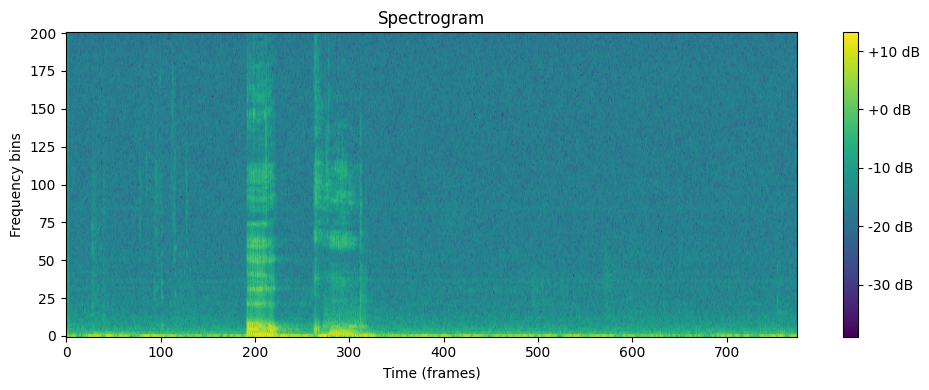

In [8]:
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

row = df_filtered.iloc[0]

# Load the audio
waveform, sample_rate = torchaudio.load(row['audio_path'])

# Plot the spectrogram
spectrogram = torchaudio.transforms.Spectrogram()(waveform)

plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.log2()[0, :, :].numpy(), aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency bins')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [9]:
df_fixed.shape

(98, 3)

In [10]:
!pip install -q git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install -y ffmpeg

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
37 packages can be upgraded. Run 'apt list --upgradable' 

In [11]:
from tqdm import tqdm

predictions = []

# Loop with progress bar
for path in tqdm(df_fixed['audio_path'], desc="Transcribing audio"):
    result = model.transcribe(path, language='yo')
    predictions.append(result['text'].strip())


Transcribing audio: 100%|██████████| 98/98 [20:27<00:00, 12.52s/it]


With AstralZander/yoruba_ASR

In [16]:
import torch
import torchaudio
from transformers import AutoProcessor, AutoModelForCTC
from tqdm import tqdm

# Load Yoruba ASR model and processor
processor = AutoProcessor.from_pretrained("AstralZander/yoruba_ASR")
model = AutoModelForCTC.from_pretrained("AstralZander/yoruba_ASR")

# Ensure model is on the right device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def transcribe_audio(path):
    # Load and resample the audio
    waveform, sample_rate = torchaudio.load(path)
    if sample_rate != 16_000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16_000)
        waveform = resampler(waveform)

    # Preprocess
    inputs = processor(waveform.squeeze(), sampling_rate=16_000, return_tensors="pt", padding=True)
    input_values = inputs.input_values.to(device)

    # Predict
    with torch.no_grad():
        logits = model(input_values).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0].strip()

    return transcription

# Run transcription on your audio files
predictions = []
for path in tqdm(df_fixed['audio_path'], desc="Transcribing with Yoruba ASR"):
    pred = transcribe_audio(path)
    predictions.append(pred)

# Add to DataFrame
df_fixed['yoruba_asr_prediction'] = predictions


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Transcribing with Yoruba ASR: 100%|██████████| 98/98 [00:04<00:00, 20.85it/s]


In [17]:
from rapidfuzz import fuzz

def show_transcription_evaluation(df, index):
    row = df.iloc[index]
    print(f" Audio: {row['audio_path']}")
    print(f" Ground Truth:      {row['lexical_word']}")
    print(f" Yoruba ASR Output: {row['yoruba_asr_prediction']}")

    score = fuzz.ratio(row['lexical_word'].lower().strip(), row['yoruba_asr_prediction'].lower().strip())
    print(f"Similarity Score:   {score:.2f} / 100")
    print("Match" if score == 100 else "Mismatch")

# Example: Show for first 5 rows
for i in range(20):
    show_transcription_evaluation(df_fixed, i)


 Audio: /content/first_100_audio/recorder_2025-05-13_12-16-44_552623.wav
 Ground Truth:      ọ̀ku
 Yoruba ASR Output: Ọku.
Similarity Score:   75.00 / 100
Mismatch
 Audio: /content/first_100_audio/recorder_2025-05-13_12-17-00_468236.wav
 Ground Truth:      otẹ̀
 Yoruba ASR Output: Kó tẹ̀.
Similarity Score:   54.55 / 100
Mismatch
 Audio: /content/first_100_audio/recorder_2025-05-13_12-17-13_035513.wav
 Ground Truth:      sumi
 Yoruba ASR Output: Ṣun mi.
Similarity Score:   54.55 / 100
Mismatch
 Audio: /content/first_100_audio/recorder_2025-05-13_12-17-17_351388.wav
 Ground Truth:      akónilẹ́rú
 Yoruba ASR Output: Akó ni lẹ́rú.
Similarity Score:   86.96 / 100
Mismatch
 Audio: /content/first_100_audio/recorder_2025-05-13_12-17-22_218731.wav
 Ground Truth:      ìfẹ́kúfẹ̀ẹ́
 Yoruba ASR Output: Ìfẹ́ Ku fẹ̀.
Similarity Score:   69.57 / 100
Mismatch
 Audio: /content/first_100_audio/recorder_2025-05-13_12-17-35_701398.wav
 Ground Truth:      gbàgbátí
 Yoruba ASR Output: Ggbà àgbátí.
Similarit

In [18]:
!pip install -q transformers torchaudio librosa

With facebook/mms-1b-all

In [19]:
from transformers import AutoProcessor, AutoModelForCTC
import torch
import torchaudio
from tqdm import tqdm

# Load Facebook MMS multilingual ASR model
processor = AutoProcessor.from_pretrained("facebook/mms-1b-all")
model = AutoModelForCTC.from_pretrained("facebook/mms-1b-all")

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


preprocessor_config.json:   0%|          | 0.00/254 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (1-4): 4 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2LayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projec

In [20]:
def transcribe_audio_mms(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)

    # (MMS expects 16kHz)
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)

    inputs = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt")
    input_values = inputs.input_values.to(device)

    with torch.no_grad():
        logits = model(input_values).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0].strip()

    return transcription


In [22]:
# Loop through the dataset and get predictions
mms_predictions = []
for path in tqdm(df_fixed['audio_path'], desc="Transcribing with MMS"):
    pred = transcribe_audio_mms(path)
    mms_predictions.append(pred)

# Add to DataFrame
df_fixed['mms_prediction'] = mms_predictions


Transcribing with MMS: 100%|██████████| 98/98 [00:05<00:00, 17.77it/s]


In [23]:
from rapidfuzz import fuzz

def show_mms_eval(df, index):
    row = df.iloc[index]
    gt = row['lexical_word']
    pred = row['mms_prediction']

    score = fuzz.ratio(gt.lower().strip(), pred.lower().strip())

    print(f"\nAudio: {row['audio_path']}")
    print(f" Ground Truth:      {gt}")
    print(f"MMS Prediction:     {pred}")
    print(f"Similarity Score:   {score:.2f} / 100")
    print("Match" if score == 100 else " Mismatch")

# Show first 5
for i in range(20):
    show_mms_eval(df_fixed, i)



Audio: /content/first_100_audio/recorder_2025-05-13_12-16-44_552623.wav
 Ground Truth:      ọ̀ku
MMS Prediction:     aku
Similarity Score:   57.14 / 100
 Mismatch

Audio: /content/first_100_audio/recorder_2025-05-13_12-17-00_468236.wav
 Ground Truth:      otẹ̀
MMS Prediction:     hute
Similarity Score:   25.00 / 100
 Mismatch

Audio: /content/first_100_audio/recorder_2025-05-13_12-17-13_035513.wav
 Ground Truth:      sumi
MMS Prediction:     sun mi
Similarity Score:   80.00 / 100
 Mismatch

Audio: /content/first_100_audio/recorder_2025-05-13_12-17-17_351388.wav
 Ground Truth:      akónilẹ́rú
MMS Prediction:     a koni leru
Similarity Score:   57.14 / 100
 Mismatch

Audio: /content/first_100_audio/recorder_2025-05-13_12-17-22_218731.wav
 Ground Truth:      ìfẹ́kúfẹ̀ẹ́
MMS Prediction:     i fe ku fee
Similarity Score:   27.27 / 100
 Mismatch

Audio: /content/first_100_audio/recorder_2025-05-13_12-17-35_701398.wav
 Ground Truth:      gbàgbátí
MMS Prediction:     gbagbati
Similarity Score

In [13]:
!pip install -q rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00
